Importing required libraries

In [4]:
import pandas as pd
#from pandas import tools
import matplotlib.pylab as plt

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


Load the dataset

In [5]:
sales_data = pd.read_csv('datasets_623780_1120494_Alcohol_Sales.csv')
sales_data.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


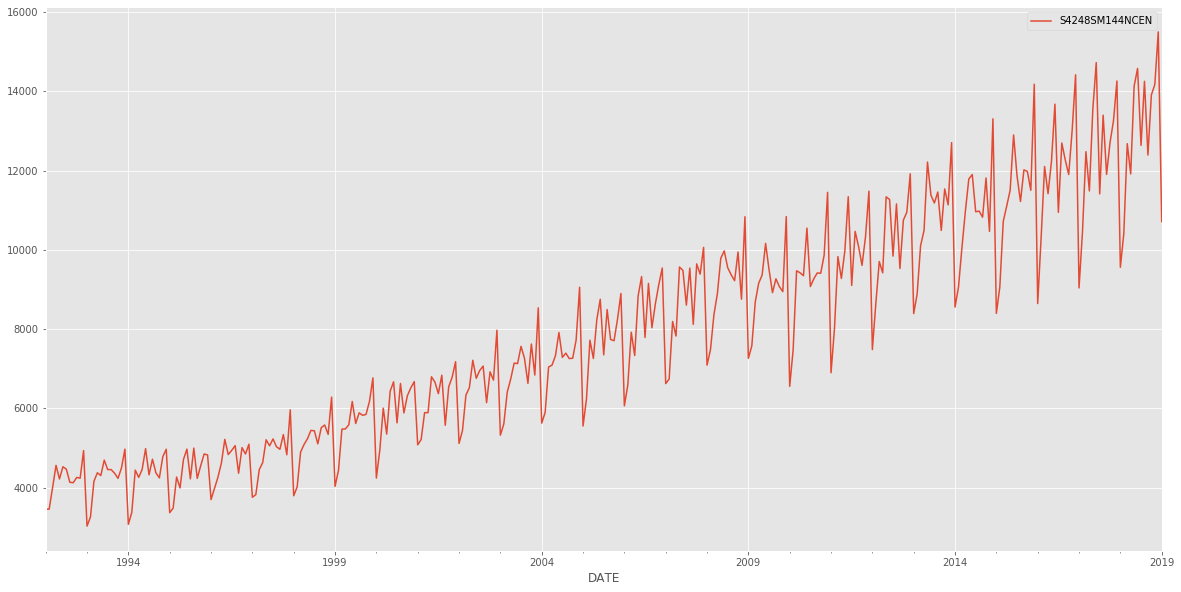

In [6]:
sales_data = pd.read_csv('datasets_623780_1120494_Alcohol_Sales.csv')
sales_data['DATE']=pd.to_datetime(sales_data['DATE'])
sales_data.set_index('DATE', inplace=True)

sales_data.plot()

the scatterplot

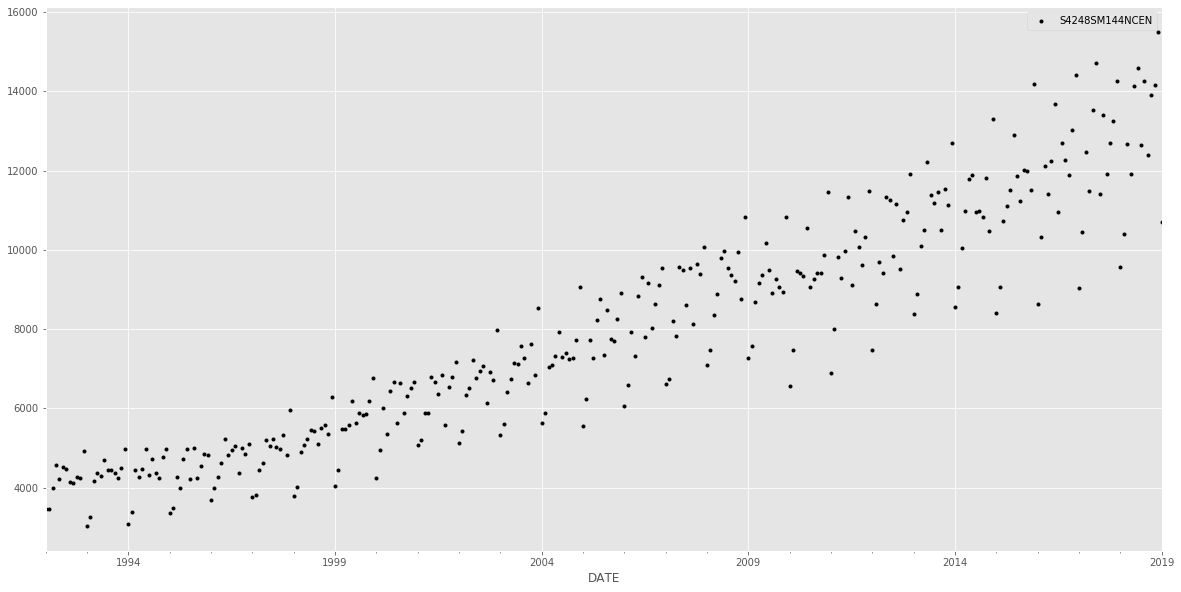

In [21]:
sales_data.plot(style = 'k.')

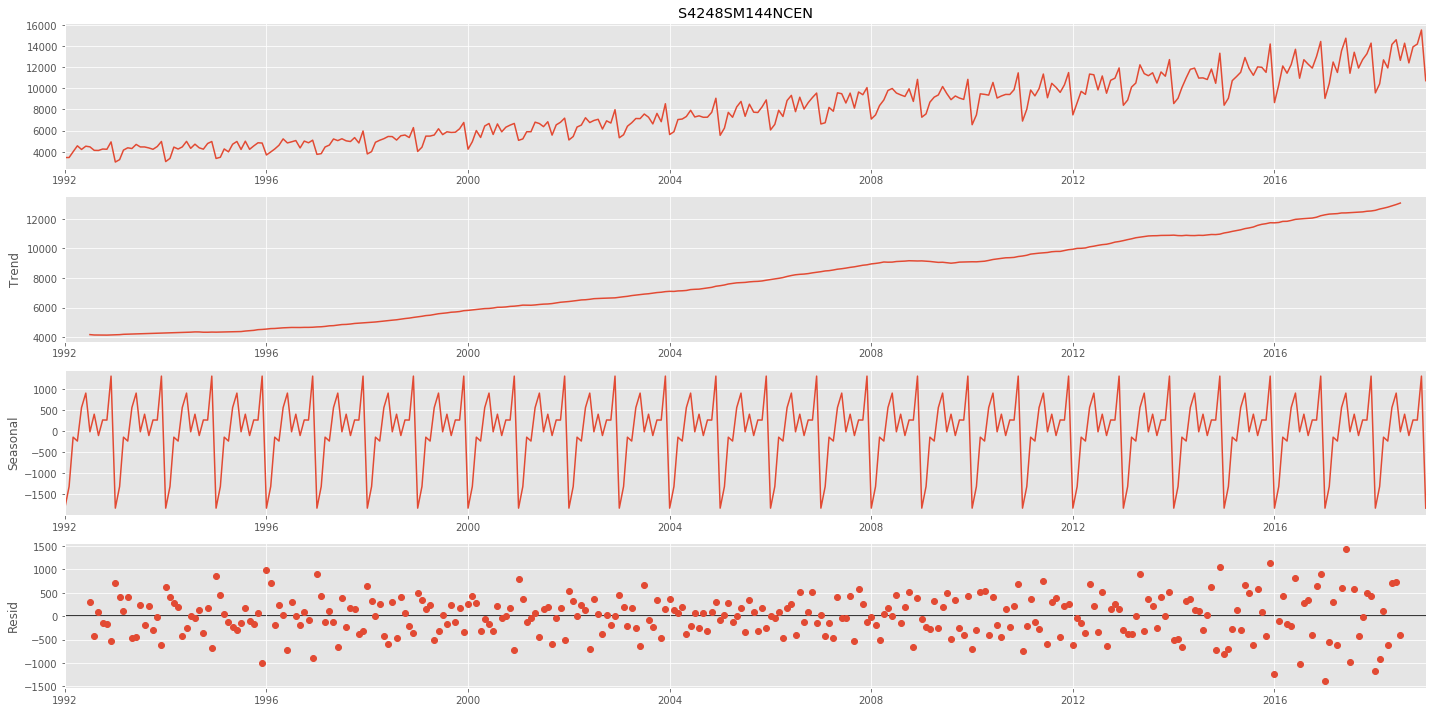

In [7]:
#from statsmodels.tsa.seasonable import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(sales_data['S4248SM144NCEN'], model = 'additive')

x = decomposed.plot()


The ARIMA model

In [8]:
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 

Fit auto_arima function

In [9]:
stepwise_fit = auto_arima(sales_data['S4248SM144NCEN'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True) 

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4605.262, BIC=4623.977, Fit time=2.760 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4870.158, BIC=4877.644, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4733.619, BIC=4748.591, Fit time=0.288 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4633.809, BIC=4648.781, Fit time=1.584 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4573.298, BIC=4595.756, Fit time=1.757 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4607.244, BIC=4625.959, Fit time=1.356 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4554.660, BIC=4580.861, Fit time=5.992 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4569.519, BIC=4591.977, Fit time=8.172 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4512.287, BIC=4542.231, Fit time=6.725 seconds
Fit ARIMA: order=(2, 1, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  325
Model:             SARIMAX(3, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -2239.351
Date:                                 Sun, 14 Jun 2020   AIC                           4494.701
Time:                                         00:48:01   BIC                           4524.645
Sample:                                              0   HQIC                          4506.669
                                                 - 325                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4378      0.112      3.894      0.000       0.217       0.658
ar.L1         -0.1074      0.049     -2.178      0.029      -0.204      -0.011
ar.L2          0.1874      0.046      4.054      0.000       0.097       0.278
ar.L3          0.5305      0.044     12.149      0.000       0.445       0.616
ma.L1         -1.0000      0.070    -14.186      0.000      -1.138      -0.862
ma.S.L12      -0.2524      0.055     -4.595      0.000      -0.360      -0.145
ma.S.L24      -0.2657      0.052     -5.106      0.000      -0.368      -0.164
sigma2      9.689e+04   7.28e-07   1.33e+11      0.000    9.69e+04    9.69e+04
===================================================================================
Ljung-Box (Q):                      172.55   Jarque-Bera (JB):                14.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.27   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.58e+27. Standard errors may be unstable.
"""

Split data into train and test sets

In [12]:
train = sales_data.iloc[:len(sales_data) - 12]
test = sales_data.iloc[len(sales_data) - 12 :]

#Fit A SARIMAX (0, 1, 1) x (2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['S4248SM144NCEN'],
               order = (0, 1, 1),
               seasonal_order = (2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     S4248SM144NCEN   No. Observations:                  313
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2170.780
Date:                            Sun, 14 Jun 2020   AIC                           4351.560
Time:                                    01:13:16   BIC                           4370.079
Sample:                                01-01-1992   HQIC                          4358.971
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8619      0.027    -31.911      0.000      -0.915      -0.809
ar.S.L12       0.5057      0.083      6.129      0.000       0.344       0.667
ar.S.L24      -0.5020      0.050    -10.122      0.000      -0.599      -0.405
ma.S.L12      -0.6386      0.079     -8.096      0.000      -0.793      -0.484
sigma2       1.08e+05   7585.837     14.236      0.000    9.31e+04    1.23e+05
===================================================================================
Ljung-Box (Q):                      208.95   Jarque-Bera (JB):                35.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predictions of ARIMA Model against the test set

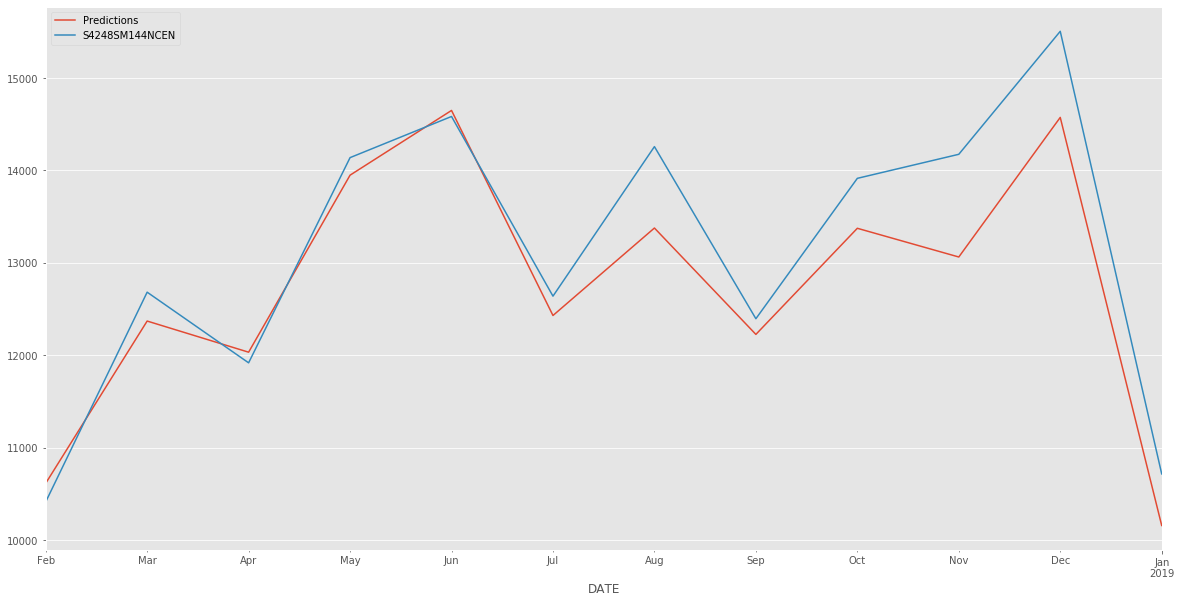

In [13]:
start = len(train)
end = len(train) + len(test) - 1

#Predictions for one-year against the test set

predictions = result.predict(start, end, typ = 'levels').rename("Predictions")

#plot predictions and actual values

predictions.plot(legend = True)
test['S4248SM144NCEN'].plot(legend = True)

Evaluate the model using MSE and RMSE

In [16]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

#Calculate root mean squared error
rmse(test['S4248SM144NCEN'], predictions)

#Calculate mean squared error
#mean_squared_error(test['S4248SM144NCEN'], predictions)

558.4391955259291

In [17]:
#Calculate mean squared error
mean_squared_error(test['S4248SM144NCEN'], predictions)

311854.3350996469

Forecast using ARIMA

In [18]:
model = model = SARIMAX(sales_data['S4248SM144NCEN'], order = (0, 1, 1), seasonal_order = (2, 1, 1, 12))
result = model.fit()

Forecast for the next 3 years

In [19]:
forecast = result.predict(start = len(sales_data), end = (len(sales_data) - 1) + 3 * 12,
                          typ = 'levels').rename('Forecast')

Plot the forecast values

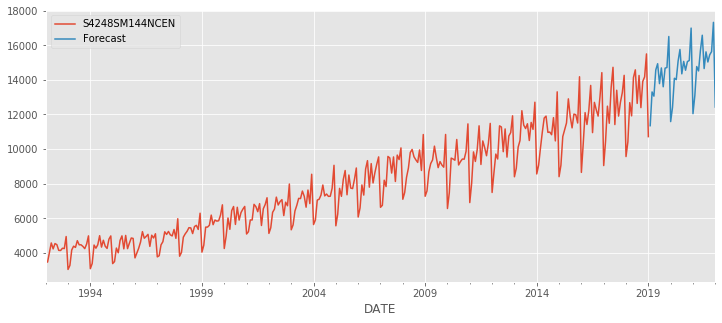

In [20]:
sales_data['S4248SM144NCEN'].plot(figsize = (12, 5), legend = True)

forecast.plot(legend = True)